# Coupled Euler's Equations

We look to solve the Euler's Equations for a given flow for a one dimensional flow.

\begin{align*}
        \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left(\rho u\right) &= 0\\
        \frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x}(P + \rho u^2) &= 0\\
        \frac{\partial}{\partial t}E + \frac{\partial}{\partial x}(u(E + P)) &= 0
\end{align*}


We use transmissive boundary conditions, that are enforced as follows, 

$$\rho^n_N = \rho^n_{N+1}, \hspace{0.3cm} u^n_{N} = u^n_{N+1}, \hspace{0.3cm}p^n_{N} = p^n_{N+1}$$


We solve test-case 1, a Riemann problem with discontinuity in $x_0 = 0.4$. The initial conditions are the following.

| $\rho_L$ | $u_L$ | $p_L$ | $\rho_R$ | $u_R$ | $p_L$ |
|:--------:|:-----:|:-----:|:--------:|:-----:|:-----:|
|    5.99924   |  19.5975 |  460.894  |   5.99242  |  -6.19633  |  46.0950  |


In [1]:
import os
import sys

sys.path.append(os.path.join(os.path.abspath(''), '../'))

import numpy as np
from solver.exact_riem import ext_riem_solver
from solver.euler import laxwendroff, roe, FCT
import matplotlib
import matplotlib.pyplot as plt

In [48]:
# Parameters
L = 1.0             # Length of the domain
T = 0.1             # Total simulation time
Nx = 2001           # Number of spatial points
Nt = 20000          # Number of time steps
dx = L / (Nx - 1)
dt = T / Nt

In [49]:
# Initial conditions
x = np.linspace(0, L, Nx)
x0 = 0.4                              # Place of discontinuity
n_0 = int(x0/dx)
gamma = 1.4
rho_L = 5.99924
rho_R = 5.99242
u_L = 19.5975
u_R = -6.19633
p_L = 460.894
p_R = 46.095

# Velocity
u = u_L*np.ones(Nx)             
u[n_0:] = u_R
# Density
rho = rho_L * np.ones(Nx)                  
rho[n_0:] = rho_R
# Pressure
press_i = p_L * np.ones(Nx)            
press_i[n_0:] = p_R
# Energy
energy = np.zeros(Nx)
energy = press_i/((gamma - 1)) + 0.5*rho*u**2

In [50]:
x[n_0]

0.4

In [51]:
vel_max = 20                        # Maximum Velocity of test case (known by analytical solution)
print(f'Courant number: {vel_max*dt/dx}')

Courant number: 0.2


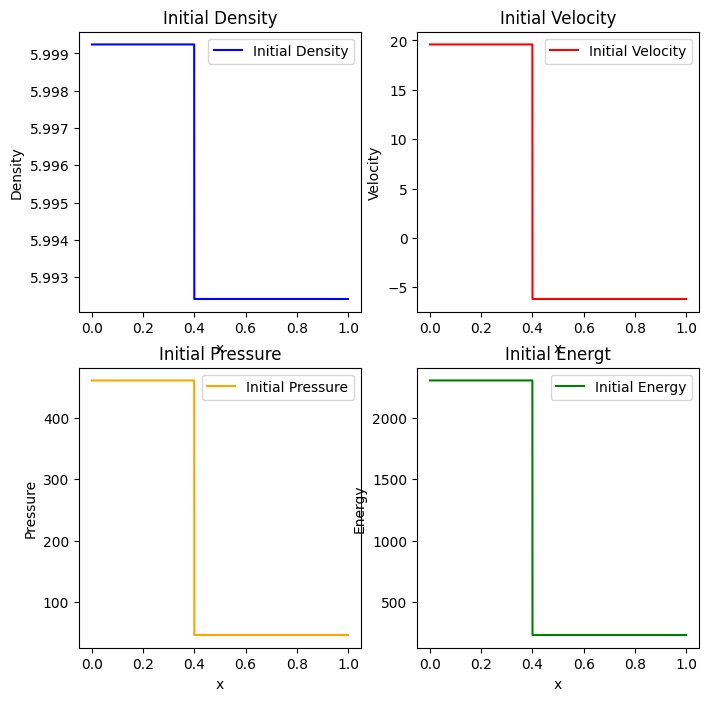

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].plot(x, rho, label='Initial Density', color='blue')
axs[0,0].set_title('Initial Density')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('Density')
axs[0,0].legend()

axs[0,1].plot(x, u, label='Initial Velocity', color='red')
axs[0,1].set_title('Initial Velocity')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('Velocity')
axs[0,1].legend()

axs[1,0].plot(x, press_i, label='Initial Pressure', color='orange')
axs[1,0].set_title('Initial Pressure')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Pressure')
axs[1,0].legend()

axs[1,1].plot(x, energy, label='Initial Energy', color='green')
axs[1,1].set_title('Initial Energt')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Energy')
axs[1,1].legend()

### Exact Solution

In [53]:
ext_den, ext_vel, ext_pre, ext_ene = ext_riem_solver(x, x0, rho, u, press_i, energy, dt, Nt)

In [54]:
comp_time = 0.035

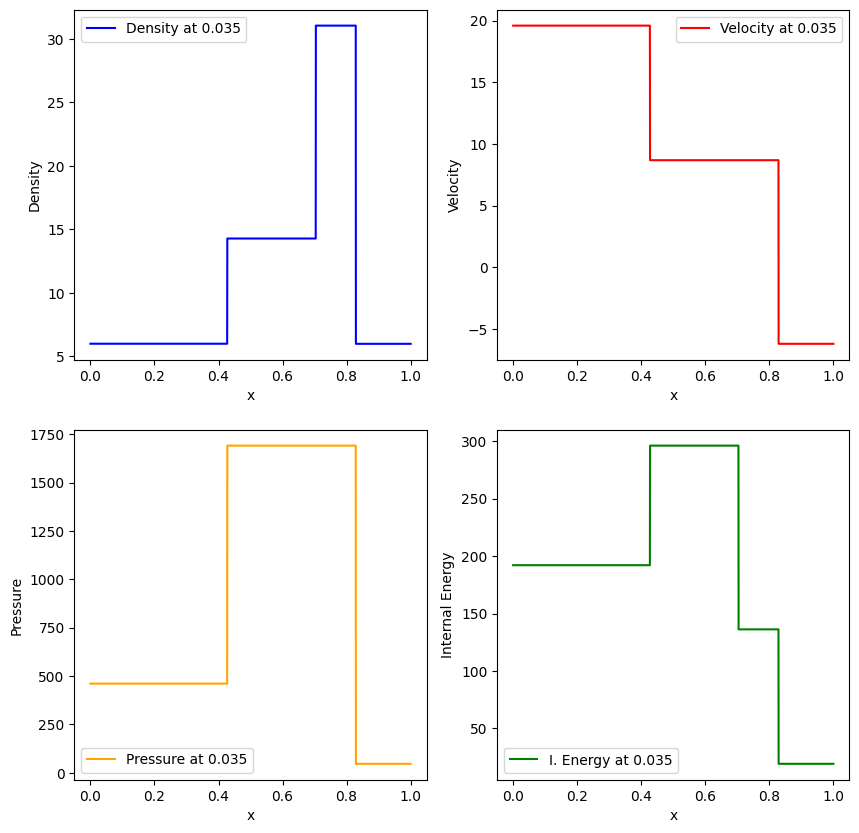

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
idx = int(comp_time/dt)
axs[0,0].plot(x, ext_den[:,idx], label=f'Density at {T * idx/Nt}', color='blue')
axs[0,0].set_title('')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('Density')
axs[0,0].legend()

axs[1,0].plot(x, ext_pre[:,idx], label=f'Pressure at {T * idx/Nt}', color='orange')
axs[1,0].set_title('')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Pressure')
axs[1,0].legend()

axs[0,1].plot(x, ext_vel[:, idx], label=f'Velocity at {T * idx/Nt}', color='red')
axs[0,1].set_title('')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('Velocity')
axs[0,1].legend()

axs[1,1].plot(x, ext_ene[:, idx], label=f'I. Energy at {T * idx/Nt}', color='green')
axs[1,1].set_title('')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Internal Energy')
axs[1,1].legend()
plt.show()

## Roe

In [56]:
sol_rho_roe, sol_mom_roe, sol_pre_roe, sol_ene_roe = roe(x, rho, u, press_i, energy, dt, Nt)

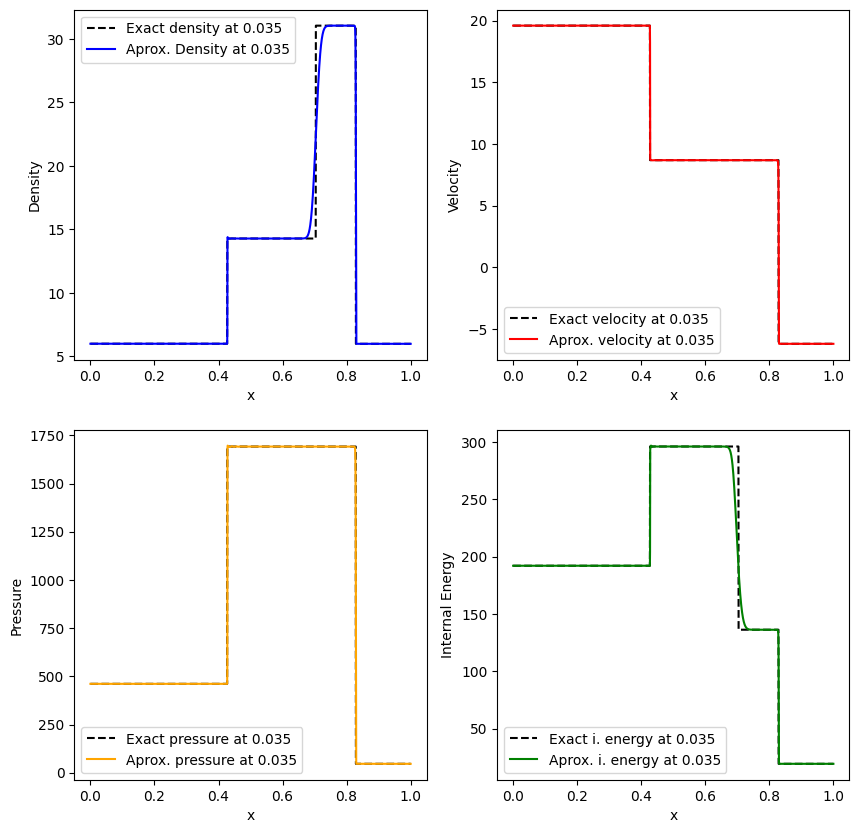

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
idx = int(comp_time/dt)
axs[0,0].plot(x, ext_den[:,idx], label=f'Exact density at {T * idx/Nt}', color='black', linestyle='dashed')
axs[0,0].plot(x, sol_rho_roe[:,idx], label=f'Aprox. Density at {T * idx/Nt}', color='blue')
axs[0,0].set_title('')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('Density')
axs[0,0].legend()

axs[1,0].plot(x, ext_pre[:,idx], label=f'Exact pressure at {T * idx/Nt}', color='black', linestyle='dashed')
axs[1,0].plot(x, sol_pre_roe[:,idx], label=f'Aprox. pressure at {T * idx/Nt}', color='orange')
axs[1,0].set_title('')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Pressure')
axs[1,0].legend()

axs[0,1].plot(x, ext_vel[:,idx], label=f'Exact velocity at {T * idx/Nt}', color='black', linestyle='dashed')
axs[0,1].plot(x, sol_mom_roe[:,idx]/sol_rho_roe[:,idx], label=f'Aprox. velocity at {T * idx/Nt}', color='red')
axs[0,1].set_title('')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('Velocity')
axs[0,1].legend()

axs[1,1].plot(x, ext_ene[:,idx], label=f'Exact i. energy at {T * idx/Nt}', color='black', linestyle='dashed')
axs[1,1].plot(x, (sol_ene_roe[:,idx]/sol_rho_roe[:,idx] - 0.5*(sol_mom_roe[:,idx]/sol_rho_roe[:,idx])**2), label=f'Aprox. i. energy at {T * idx/Nt}', color='green')
axs[1,1].set_title('')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Internal Energy')
axs[1,1].legend()
plt.show()


### Error

In [58]:
err_rho = np.linalg.norm(ext_den[:,idx] - sol_rho_roe[:,idx])/np.linalg.norm(ext_den[:,idx])
err_pre = np.linalg.norm(ext_pre[:,idx] - sol_pre_roe[:,idx])/np.linalg.norm(ext_pre[:,idx])
err_vel = np.linalg.norm(ext_vel[:,idx] - sol_mom_roe[:,idx]/sol_rho_roe[:,idx])/np.linalg.norm(ext_vel[:,idx])
err_ene = np.linalg.norm(ext_ene[:,idx] - (sol_ene_roe[:,idx]/sol_rho_roe[:,idx] - 0.5*(sol_mom_roe[:,idx]/sol_rho_roe[:,idx])**2))/np.linalg.norm(ext_ene[:,idx])

print(f'Density Relative Error: {err_rho}')
print(f'Pressure Relative Error: {err_pre}')
print(f'Velocity Relative Error: {err_vel}')
print(f'Energy Relative Error: {err_ene}')

Density Relative Error: 0.06865740990520207
Pressure Relative Error: 0.030053351719451407
Velocity Relative Error: 0.024714367981157313
Energy Relative Error: 0.04858537100458855
